In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

Read the CSV file into a pandas DataFrame & drop duplicate rows

In [2]:
df = pd.read_csv("jobs.csv")
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 304 entries, 0 to 306
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         304 non-null    object 
 1   company       303 non-null    object 
 2   salary        162 non-null    float64
 3   technologies  234 non-null    object 
 4   location      304 non-null    object 
dtypes: float64(1), object(4)
memory usage: 14.2+ KB


Drop rows with missing values

In [3]:
df.dropna(subset=["technologies"], inplace=True)
df.head()

,title,company,salary,technologies,location
2,Full Stack Engineer (Python/React),Fluvius,NaN,"['Python', 'Python3', 'React', 'React.js', 'Re...",['Україна']
3,Senior Python Backend Engineer,Reef Technlogies,9660.0,['Django'],['Польща']
4,Python Developer,NONAME DIGITAL,1850.0,"['Python', 'Django', 'Docker', 'Linux', 'API']",['Україна']
5,Python NLP Developer,Tangible AI,900.0,"['Django', 'NLP', 'Python', 'Machine Learning']",['Сполучені Штати']
6,SEnior Python WMS,Mrt,5000.0,"['WMS', 'Python']","['Релокейт', 'Обʼєднані Арабські Емірати']"


Create bar chart for top 15 technologies mentioned in job postings

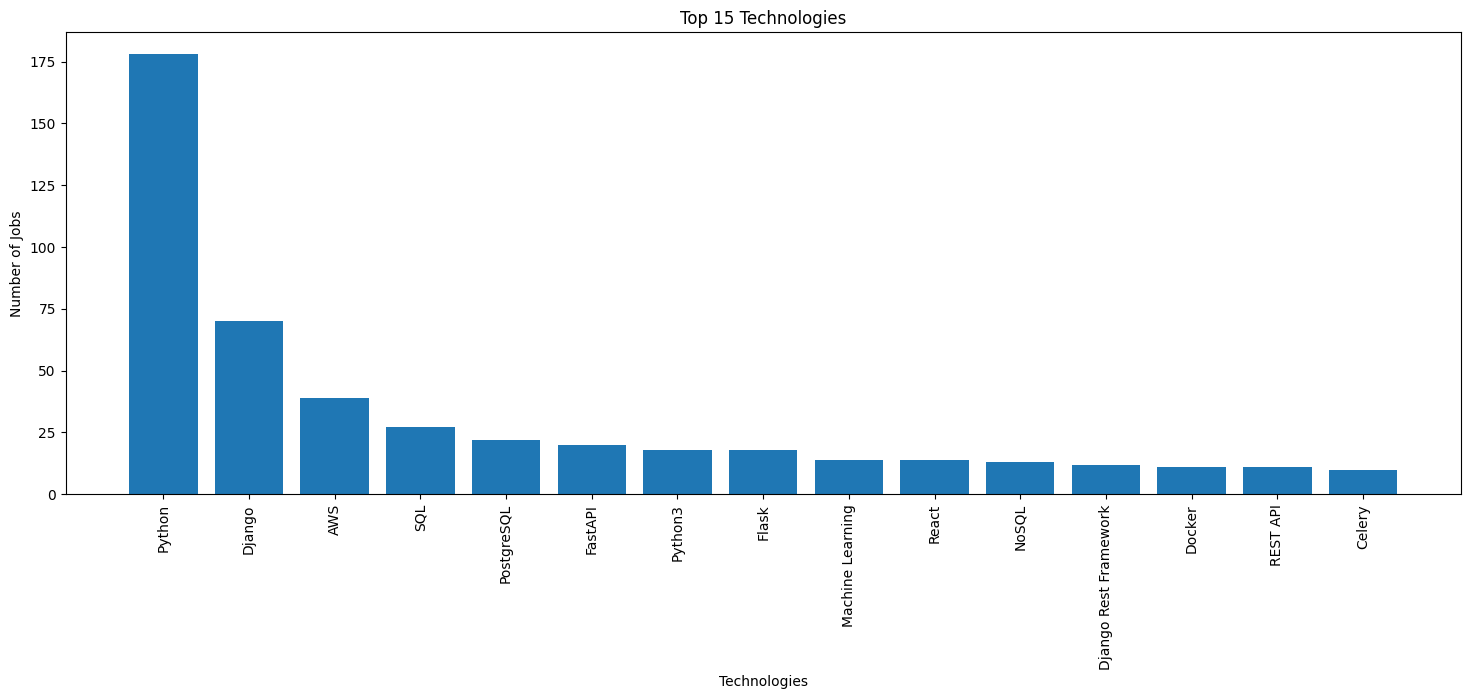

In [4]:
technologies = df["technologies"].apply(ast.literal_eval)
top_technologies = technologies.explode().value_counts().head(15)

plt.figure(figsize=(18, 6))
plt.bar(top_technologies.index, top_technologies.values)
plt.xticks(rotation=90)
plt.title("Top 15 Technologies")
plt.xlabel("Technologies")
plt.ylabel("Number of Jobs")
plt.show()

Create Pie Chart for Top 10 Job Locations.

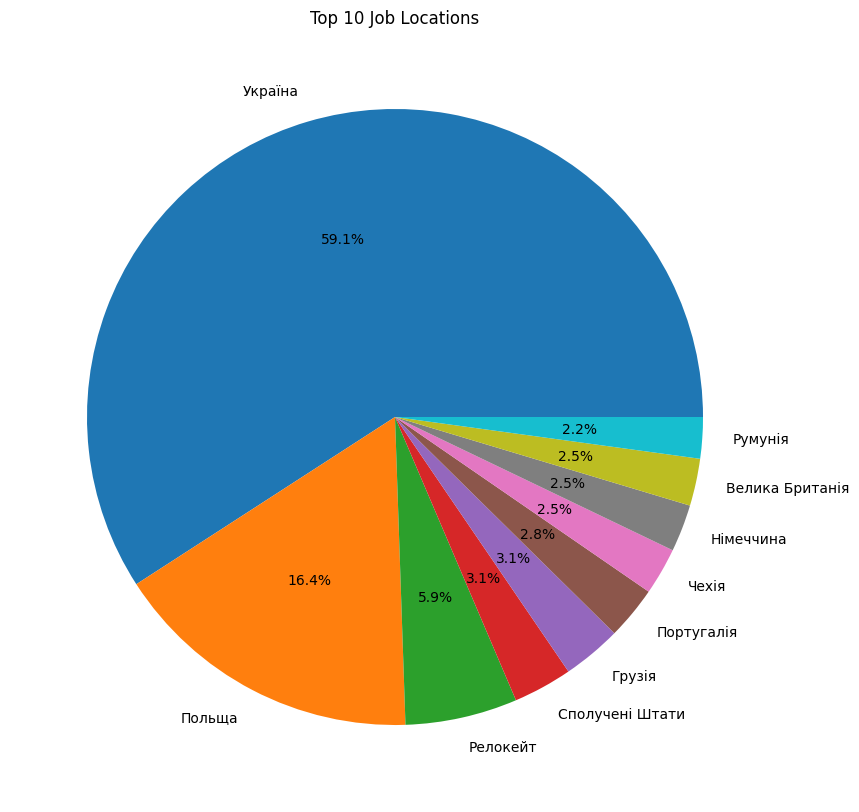

In [5]:
df["location"] = df["location"].apply(ast.literal_eval)
location_count = df["location"].explode().value_counts().head(10)
plt.figure(figsize=(10,10))
plt.pie(location_count.values, labels=location_count.index, autopct="%1.1f%%")
plt.title("Top 10 Job Locations")
plt.show()

Create horizontal bar chart for the number of jobs per company.

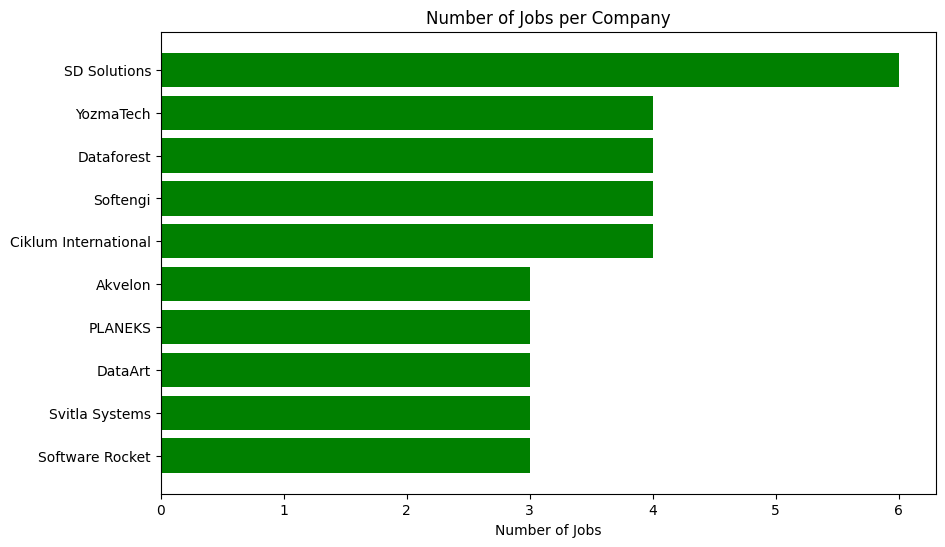

In [6]:
df = df.dropna(subset=["company"])
company_count = df["company"].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.barh(company_count.index, company_count.values, color="green")
plt.gca().invert_yaxis()
plt.title("Number of Jobs per Company")
plt.xlabel("Number of Jobs")
plt.show()

Create horizontal bar chart for average salary by country.

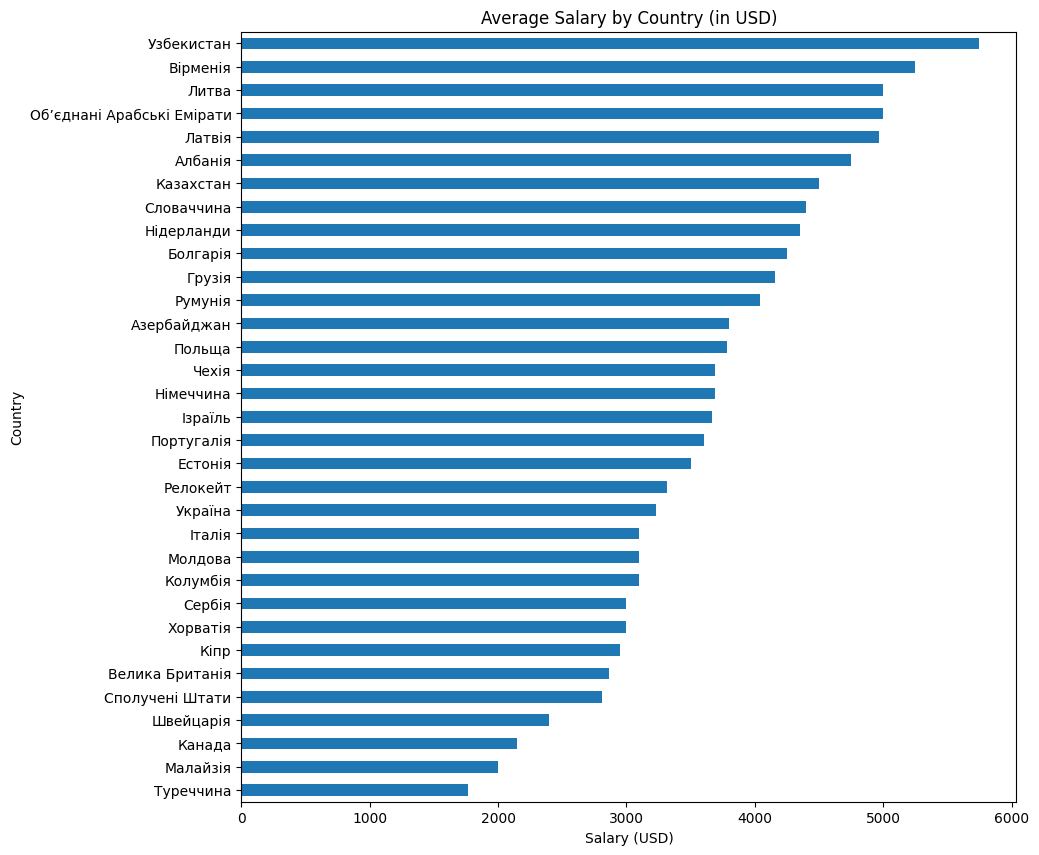

In [7]:
df = df.dropna(subset=["salary"])
location_mean_salary = df.explode("location").groupby("location")["salary"].mean()

plt.figure(figsize=(10, 10))
location_mean_salary.sort_values().plot(kind="barh")
plt.title("Average Salary by Country")
plt.xlabel("Salary")
plt.ylabel("Country")
plt.show()